In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math

In [17]:
left_side_road_coordinates = pd.read_csv('RL_map_training/road_left.csv')
right_side_road_coordinates = pd.read_csv('RL_map_training/road_right.csv')

In [18]:
right_side_list_coordinates = list(zip(right_side_road_coordinates.x_values, right_side_road_coordinates.y_values))
left_side_list_coordinates = list(zip(left_side_road_coordinates.x_values, left_side_road_coordinates.y_values))


In [19]:
def get_middle_point(coordinates: tuple, list_coordinates: list[tuple]):
    min_distance = 100000
    closest_point = None

    for temp_coordinates in list_coordinates:
        distance = ((coordinates[0] - temp_coordinates[0]) ** 2 + (coordinates[1] - temp_coordinates[1]) ** 2) ** 0.5
        if distance < min_distance:
            min_distance = distance
            closest_point = temp_coordinates

            # get midlle of coordinates and closest point
            x_middle = (coordinates[0] + closest_point[0]) / 2
            y_middle = (coordinates[1] + closest_point[1]) / 2
            middle_point = (x_middle, y_middle)


    return middle_point

In [20]:
middle_side_list_coordinates = []

for points in left_side_list_coordinates:
    middle_point = get_middle_point(points, right_side_list_coordinates)
    middle_side_list_coordinates.append(middle_point)

with open('RL_map_training/road_middle.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x_values', 'y_values'])
    writer.writerows(middle_side_list_coordinates)

In [21]:
#remove error line in the beginning of the track
df = pd.read_csv('RL_map_training/road_middle.csv')
print(len(df))
df_modified = df.iloc[16:260]
df_modified.y_values = 560.0

df_final = pd.concat([df.iloc[:16], df_modified, df.iloc[260:]])
print(len(df_final))
df_final.to_csv('RL_map_training/road_middle.csv', index=False)


4558
4558


C:\Users\boulanger\AppData\Local\Temp\ipykernel_15480\1666993261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.y_values = 560.0


In [24]:
def get_angle_from_two_points(point, previous_point):
    return math.atan2(point[0] - previous_point[0], point[1] - previous_point[1])

In [92]:
def grouper(liste, n):

    final_liste = []
    mean = 0

    for idx, elem in enumerate(liste):
        if idx % (n) == (n-1):
            mean += elem/n
            final_liste.append(mean)
            mean = 0
        else:
            mean += elem/n


    return final_liste

In [93]:
liste = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
grouper(liste, 4)

[2.5, 6.5, 10.5]

In [95]:
# find turn
turns_list_x = []
turns_list_y = []

df = pd.read_csv('RL_map_training/road_middle.csv')
list_coordinates = list(zip(df.x_values, df.y_values))

previous_point = list_coordinates[0]
list_mean_angles = []
list_angles = []
group = 4

for point in list_coordinates[1:]:

    angle = get_angle_from_two_points(point, previous_point)
    list_angles.append(angle)
    previous_point = point

list_mean_angles = grouper(list_angles, group)
print(len(list_mean_angles))

previous_mean_angle = list_mean_angles[0]
for mean_angle in list_mean_angles[1:]:
    if abs(mean_angle - previous_mean_angle) > 0.1:
        turns_list_x.append(point[0])
        turns_list_y.append(point[1])
    previous_mean_angle = mean_angle





1139


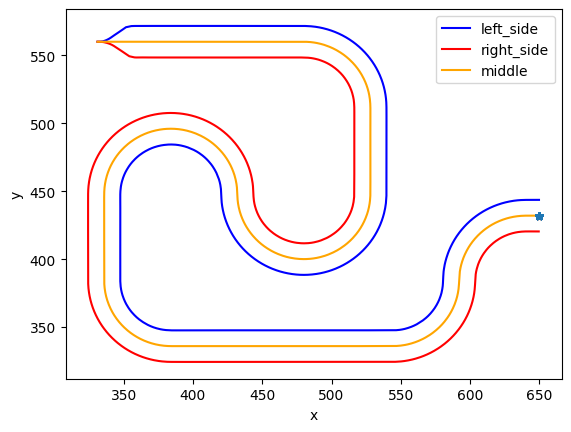

In [91]:
left_side_road_coordinates = pd.read_csv('RL_map_training/road_left.csv')
right_side_road_coordinates = pd.read_csv('RL_map_training/road_right.csv')
middle_side_road_coordinates = pd.read_csv('RL_map_training/road_middle.csv')

fig, ax = plt.subplots()

ax.plot(left_side_road_coordinates.x_values, left_side_road_coordinates.y_values, color='blue', label='left_side')
ax.plot(right_side_road_coordinates.x_values, right_side_road_coordinates.y_values, color='red', label='right_side')
ax.plot(middle_side_road_coordinates.x_values, middle_side_road_coordinates.y_values, color='orange', label='middle')

# print(len(turns_list))
# print(turns_list[0])
ax.plot(turns_list_x, turns_list_y, marker='*', ls='none')

ax.set(xlabel='x', ylabel='y')
ax.legend()
plt.show()